# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [12]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

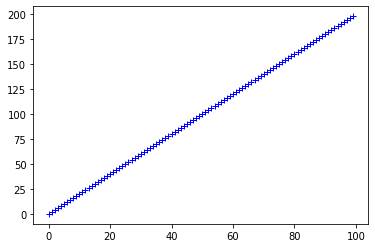

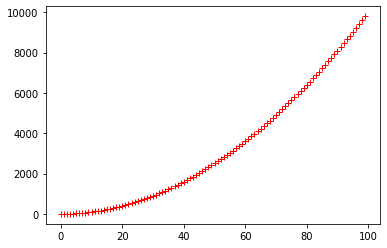

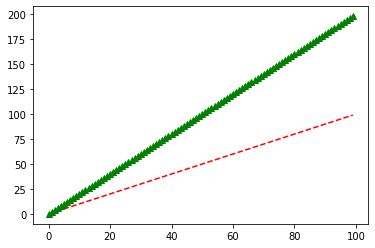

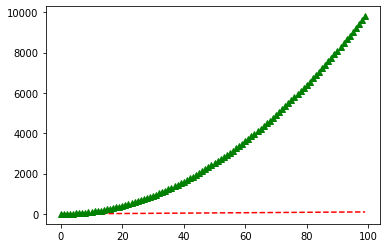

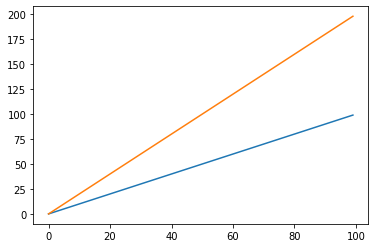

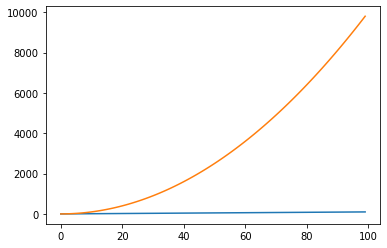

In [53]:
plt.plot(x, y, "b+")
plt.show()
plt.plot(x, z, "r+")
plt.show()


# OR
plt.plot(x, "r--", y, "g^")
plt.show()
plt.plot(x, "r--", z, "g^")
plt.show()


# OR
plt.plot(x)
plt.plot(y)
plt.show()

plt.plot(x)
plt.plot(z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

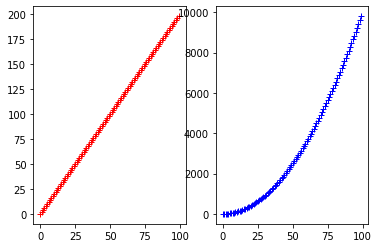

In [22]:
figure1,(xy,xz) = plt.subplots(nrows=1, ncols=2)

xy.plot(x, y, "r+")
xz.plot(x, z, "b+")
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0.5, 0.98, 'XY&XZ_figure1')

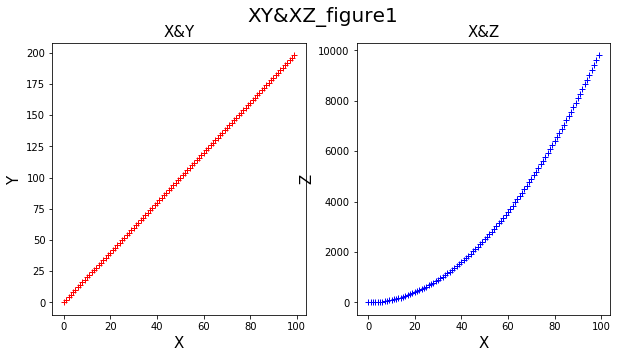

In [42]:
figure1,(xy,xz) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))


xy.plot(x, y, "r+")
xy.set_ylabel("Y", fontsize=15)
xy.set_xlabel("X", fontsize=15)
xy.set_title("X&Y", fontsize=15)


xz.plot(x, z, "b+")
xz.set_ylabel("Z", fontsize=15)
xz.set_xlabel("X", fontsize=15)
xz.set_title("X&Z", fontsize=15)

figure1.suptitle("XY&XZ_figure1", fontsize=20)

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

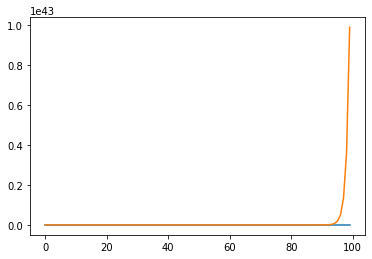

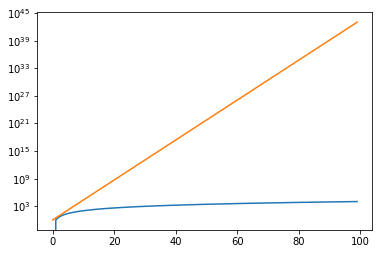

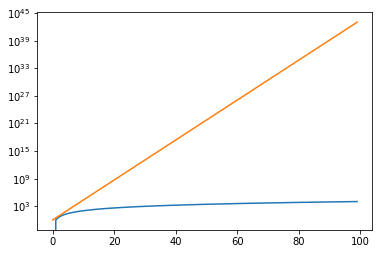

In [70]:
p=x**2 #power
e=np.exp(x) #exponencial


#normal
plt.plot(p)
plt.plot(e)
plt.show()
print("\n")


#logarithmic
plt.plot(p)
plt.plot(e)
plt.yscale("log") 
plt.show()
#OR (also logarithmic)
plt.plot(x,p)
plt.plot(x,e)
plt.yscale("log")
plt.xscale("linear")
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

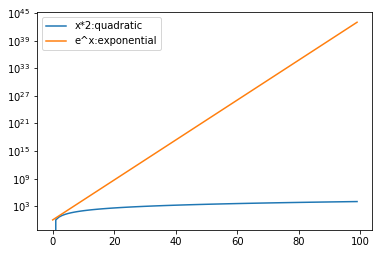

In [74]:
# plt.legend(): place a legend on the axes

p=x**2 #power (quadratic)
e=np.exp(x) #exponential

plt.plot(x,p, label = "x*2:quadratic")
plt.plot(x,e, label = "e^x:exponential")
plt.yscale("log")
plt.xscale("linear")
plt.legend()
plt.show()




## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [76]:
fitbit = pd.read_csv("fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

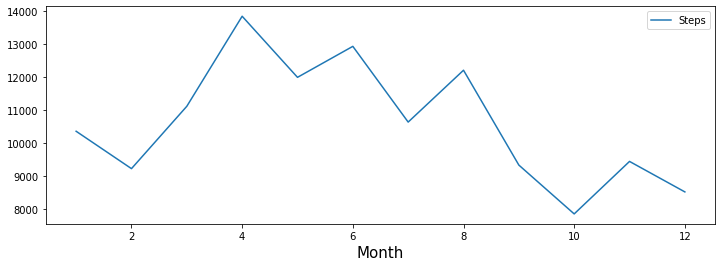

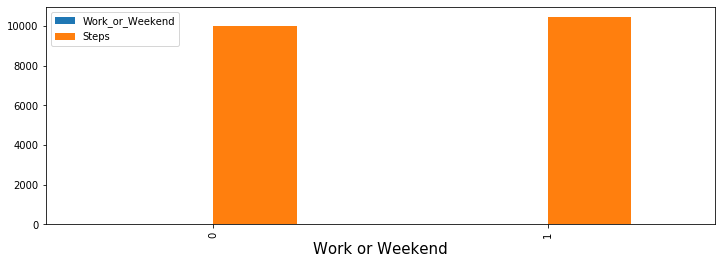

In [114]:
# MEDIAN STEPS BY MONTH_ENCODED

median_steps_month = fitbit.groupby(["Months_encoded"]).agg({"Steps":"median"})
#display(median_steps_month.head())
median_steps_month.plot(figsize=(12,4)).set_xlabel("Month", fontsize=15) #kind="bar"

plt.savefig("median_steps_month.png")




# MEDIAN STEPS BY WORK_OR_WEEKEND

median_steps_work_or_weekend = fitbit.groupby(["Work_or_Weekend"]).agg({"Steps":"median"}).reset_index()
#display(median_steps_work_or_weekend.head())
median_steps_work_or_weekend.plot(kind = "bar", figsize=(12,4)).set_xlabel("Work or Weekend", fontsize=15)

plt.savefig("median_steps_work_or_weekend.png")




#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

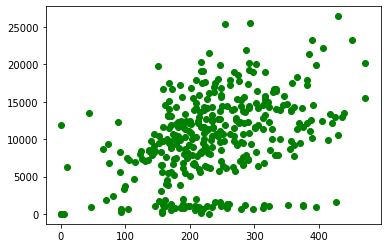

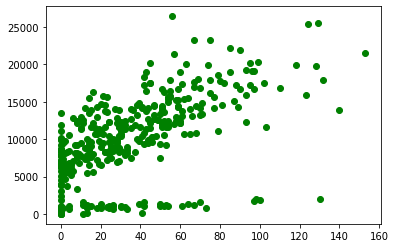

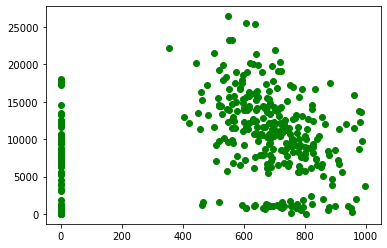

In [122]:
fitbit.head()

plot_col = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

for element in plot_col:
    plt.scatter(fitbit[element], fitbit["Steps"], c="green")
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [124]:
titanic = pd.read_csv("titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [125]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [130]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include = "number")

#titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [131]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include = "object")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [135]:
plt.style.use("classic")
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

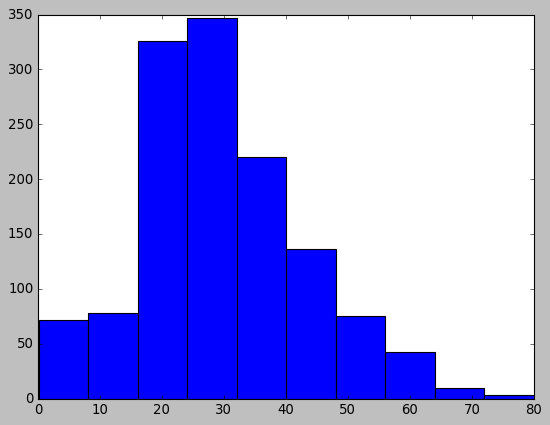

In [144]:
plt.hist(titanic["Age"])

#OR
#titanic["Age"].hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

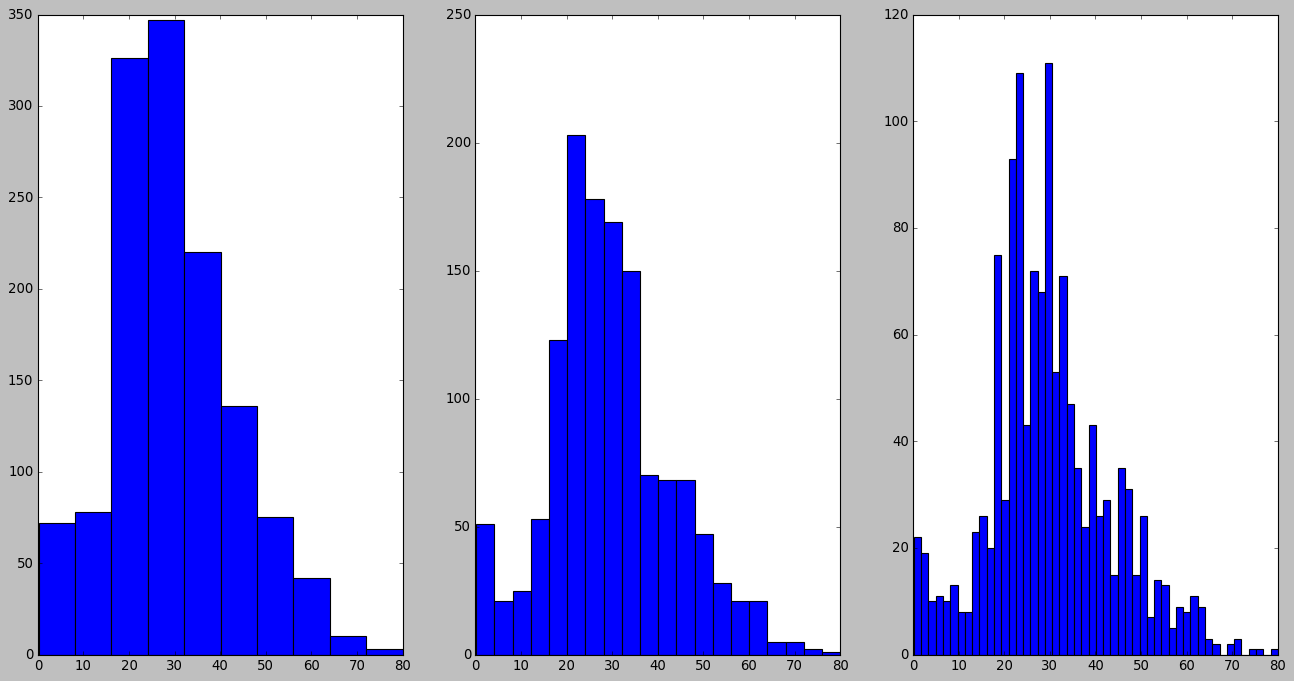

In [147]:
fig1, (bin1,bin2,bin3) = plt.subplots(nrows=1, ncols=3, figsize=(20,10)) # or just put (1,3)

bin1.hist(titanic["Age"], bins=10)
bin2.hist(titanic["Age"], bins=20)
bin3.hist(titanic["Age"], bins=50)

#### How does the bin size affect your plot?

In [ ]:
"""
U have pros and cons.
if u have a bigger bin, is more confuse to analise the data, but for another hand also gives u a more detailed analises 

"""

#### Use seaborn to show the distribution of column `Age`.

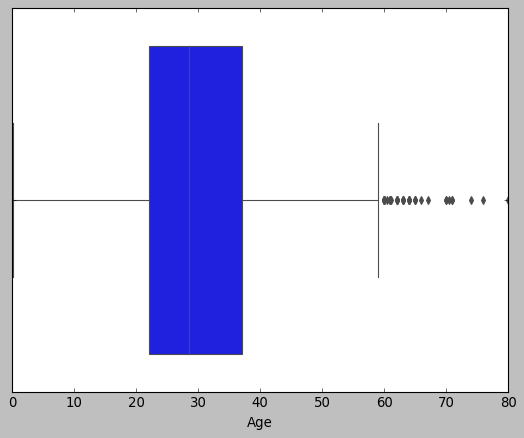

In [153]:
sns.boxplot(titanic["Age"])

# sns.distplot(titanic["Age"])  other way

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

C:\Users\HP\anaconda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


([<matplotlib.patches.Wedge at 0x2573aff2588>,
 [Text(0.480836864838257, 0.9893411491555963, 'Male'),
  Text(-0.4808369574670582, -0.9893411041363958, 'Female')])

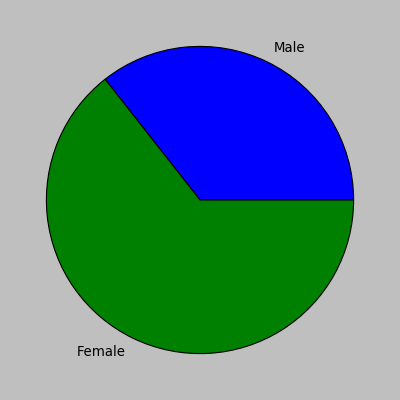

In [192]:
# Method 1 - matplotlib

#titanic["Gender"].hist() 
#plt.bar(titanic["Gender"].unique(), titanic["Gender"].value_counts())



gender = titanic.groupby("Gender").agg({"Gender":"count"})
plt.pie(gender, labels = ["Male", "Female"])

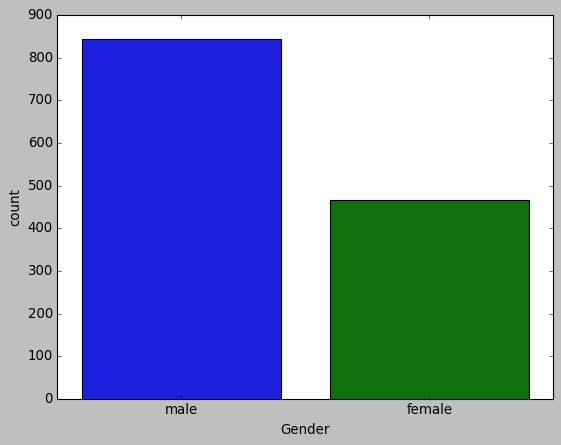

In [171]:
# Method 2 - seaborn
sns.countplot(titanic["Gender"])

# other way (but dont know how to change labels)
# sns.barplot(data=titanic, x=titanic["Gender"].value_counts(), y=titanic["Gender"].value_counts())

#### Use the right plot to visualize the column `Pclass`.

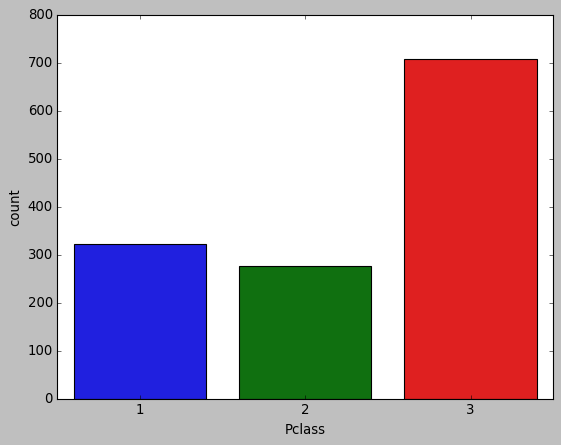

In [177]:
sns.countplot(titanic["Pclass"])


# other way
# titanic["Pclass"].hist()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

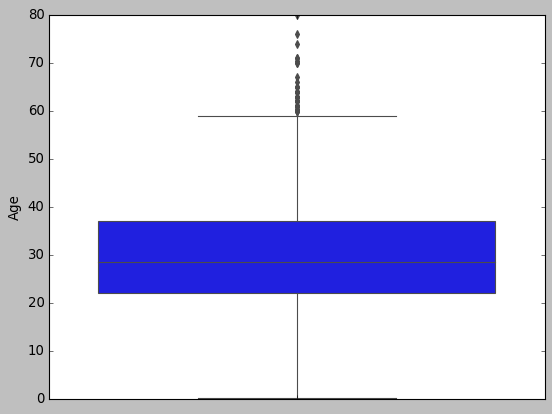

In [188]:
sns.boxplot(y="Age", data = titanic)

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

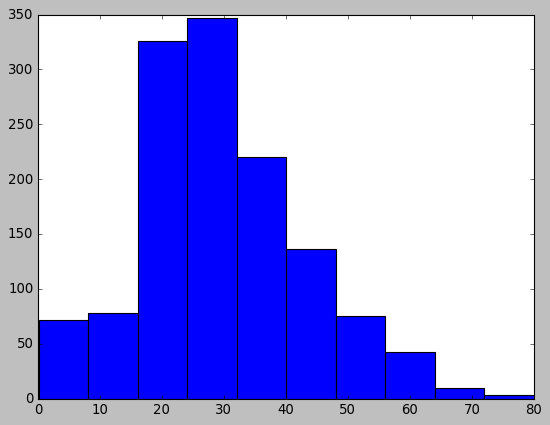

In [189]:
# other option (better the above i think for summarising)
plt.hist(titanic["Age"])

#### What does the last plot tell you about the feature `Age`?

In [190]:
"""
gives us the minimum age (titanic["Age"].min() = 0.17), Q1(just over 20), median(near 28,29), Q3(about 37) and the maximum 
age(titanic["Age"].max() = 80.0). 
We can see that most ages are between 20-40 years old, being the median value near the middle. 

"""

'\ngives us the minimum age (titanic["Age"].min() = 0.17), Q1(just over 20), median(near 28,29), Q3(about 37) and the maximum \nage(titanic["Age"].max() = 80.0). \nWe can see that most ages are between 20-40 years old, being the median value near the middle. \n\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

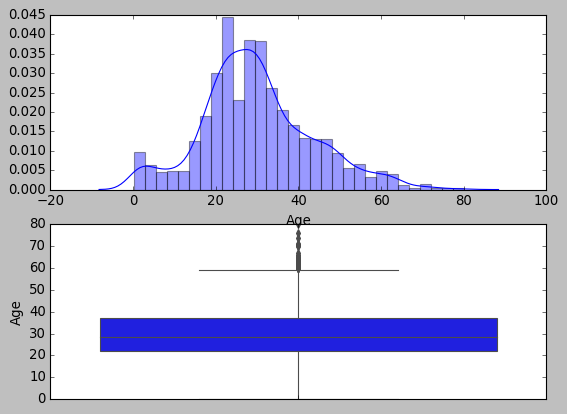

In [205]:
fig, axes = plt.subplots(nrows=2, ncols=1)
sns.distplot(titanic["Age"], ax=axes[0])
sns.boxplot(y="Age", data=titanic, ax=axes[1]) # orient = "v"

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
gives more of a detail description of the distribution of the age
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

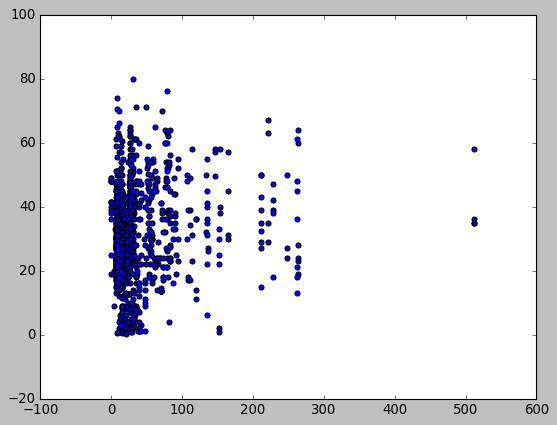

In [211]:
# Method 1 - matplotlib
plt.scatter(titanic["Fare"], titanic["Age"]) # positive linear relationship

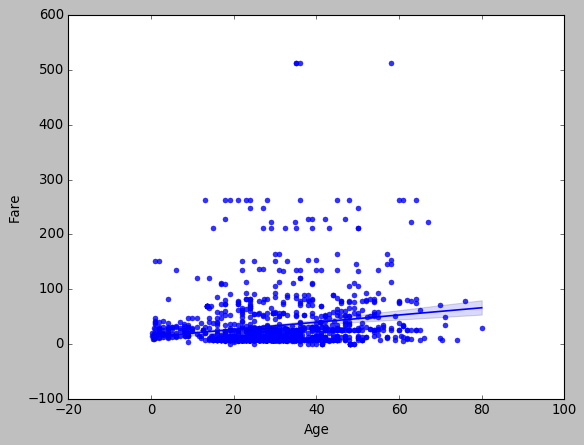

In [216]:
# Method 2 - seaborn

sns.regplot(x="Age", y="Fare", data=titanic, color="b") # positive linear relationship

# other way
# sns.lineplot(titanic["Fare"], titanic["Age"])

#### Plot the correlation matrix using seaborn.

'\n# other way(found on google...obviously)\n\n\n#Compute the correlation matrix\ncorr = titanic.corr()\n\n#Generate a mask for the upper triangle\nmask = np.triu(np.ones_like(corr, dtype=bool))\n\n#Set up the matplotlib figure\nf, ax = plt.subplots(figsize=(11, 9))\n\n#Generate a custom diverging colormap\ncmap = sns.diverging_palette(230, 20, as_cmap=True)\n\n#Draw the heatmap with the mask and correct aspect ratio\nsns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,\n            square=True, linewidths=.5, cbar_kws={"shrink": .5})\n'

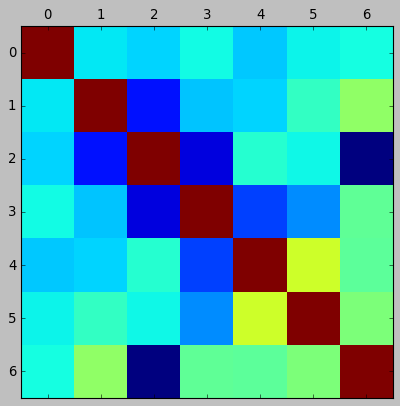

In [225]:
# simpler way 
plt.matshow(titanic.corr())



"""
# other way(found on google...obviously)


#Compute the correlation matrix
corr = titanic.corr()

#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
"""            

#### What are the most correlated features?

In [ ]:
"""
in the other option, we can see better. Probably (Fare, Survived) & (Parch, SibSp)

"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

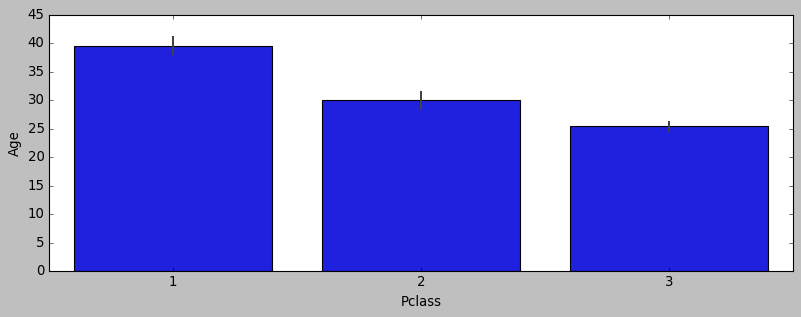

In [227]:
plt.figure(figsize=(12, 4))
sns.barplot(x="Pclass", y="Age", data=titanic, color="b")

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

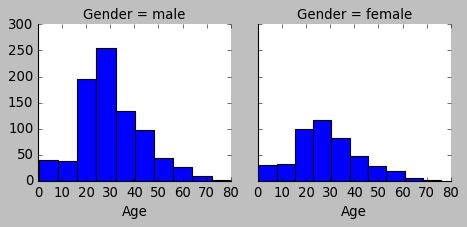

In [234]:
# some of the features and functions (like sns.histplot) doesnt work for me, i dont know why

g = sns.FacetGrid(titanic, col="Gender")
g.map(plt.hist, "Age")